# Подсчет размера корпуса

In [ ]:
from nltk import word_tokenize
import json
import nltk
nltk.download('punkt')

In [4]:
with open('corpus.json') as json_file:
    dictionary = json.load(json_file)

In [5]:
strings = []
for i in dictionary:
  strings.append(dictionary[i][0])
strings = " ".join(strings)
tokens = word_tokenize(strings)

In [6]:
print(f'Размер корпуса: {len(tokens)}')

Размер корпуса: 60089


# Topic modelling

In [ ]:
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download ru_core_news_md -qq

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

In [7]:
texts = []
for i in dictionary:
  texts.append(dictionary[i][0])

In [ ]:
nlp = spacy.load('ru_core_news_md')

ins = ['NOUN', 'VERB', 'ADJ'] #tags to include
tokens = []

for summary in nlp.pipe(texts):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_  in ins and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

In [12]:
dictionary1 = Dictionary(tokens) #create dict with unique id for each item
print(dictionary1.token2id)

dictionary1.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary1.doc2bow(doc) for doc in tokens]
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary1, iterations=50, num_topics=10, workers = 4, passes=10) #build trial lda model

{'бекон': 0, 'большой': 1, 'готовый': 2, 'гриль': 3, 'добавить': 4, 'жарить': 5, 'жир': 6, 'зелёный': 7, 'злак': 8, 'количество': 9, 'корочка': 10, 'ломтик': 11, 'лук': 12, 'масло': 13, 'мелко': 14, 'обжарить': 15, 'образование': 16, 'омлет': 17, 'переложить': 18, 'помешивать': 19, 'порезанный': 20, 'прожилка': 21, 'сковорода': 22, 'сливочный': 23, 'смазанный': 24, 'смесь': 25, 'тонкий': 26, 'увенчать': 27, 'хлеб': 28, 'хрустящей': 29, 'яйцо': 30, 'английский': 31, 'булочка': 32, 'ветчина': 33, 'второй': 34, 'выложить': 35, 'ложка': 36, 'момент': 37, 'накрыть': 38, 'намазать': 39, 'нижний': 40, 'перемешать': 41, 'подавать': 42, 'подсушить': 43, 'половина': 44, 'половинка': 45, 'положить': 46, 'последний': 47, 'разрезать': 48, 'сбоку': 49, 'томатный': 50, 'тостер': 51, 'чатни': 52, 'шпинат': 53, 'яичница': 54, 'багель': 55, 'долька': 56, 'копчёный': 57, 'лимон': 58, 'лосось': 59, 'перец': 60, 'посыпать': 61, 'чёрный': 62, 'бумажный': 63, 'влить': 64, 'выпекать': 65, 'горячий': 66, 'духо

Данные метрики помогают выделить оптимальное колиечство топиков. Было выбрано примерно среднее между максимальными скорами по обеим метрикам, а также удовлетворявшее желанию увидеть больше двух топиков число - 4.

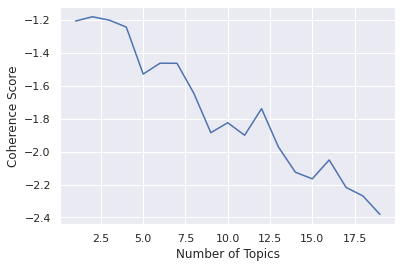

In [13]:
topics = [] #C_umass
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary1, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary1, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

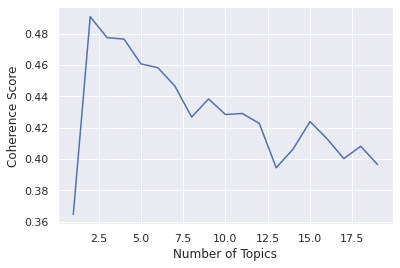

In [14]:
topics = [] #C_v
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary1, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = tokens, corpus=corpus, dictionary=dictionary1, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [15]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary1, iterations=100, num_topics=4, workers = 4, passes=100) # best variant

In [17]:
lda_model.print_topics(-1) #topics detected

lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary1) # visualization
pyLDAvis.save_html(lda_display, 'index.html')